# Iris Plant Classification






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.preprocessing import StandardScaler

In [ ]:
data = datasets.load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=list(data['feature_names']) + ['target'])
iris_df = iris_df.drop(['sepal length (cm)', 'sepal width (cm)'] , axis=1)

In [ ]:
iris_df.target = iris_df.target.replace(1, 0) # Setosa and Versicolor becomes class=0
iris_df.target = iris_df.target.replace(2, 1) # Virginica becomes class=1

In [ ]:
def plot_2d_examples(classifiers, names, datasets, figsize=(27,9), h = .02):
  """
  Here we define a helper method. We want to make a lot of visualizations, so lets 
  organize the visualization code into a method we can re-use. 
  - classifiers is a list of scikit-learn classifier objects
  - names is a list of strings corresponding to each classifier in 'classifiers'. As such they should have the same length
  - datasets will be a list of 2D datasets, each being a tuple of (X, y)
  - h is the step size of the mesh. Smaller sizes show more detail
  """
  figure = plt.figure(figsize=figsize)
  i = 1
    
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=.4, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                 edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
                 edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                     edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                     edgecolors='k', alpha=0.3)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

In [ ]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']
datasets = [(X, y)]

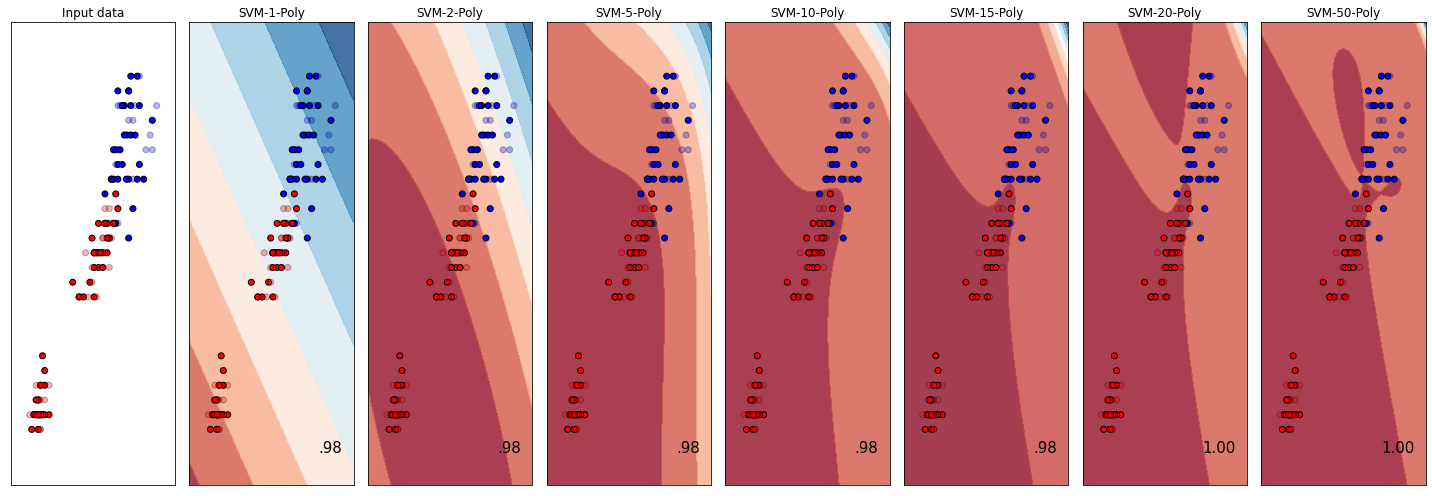

In [ ]:
classifiers = []
names = []

for i in [1, 2, 5, 10, 15, 20, 50]:
  classifiers.append(SVC(kernel='poly', degree=i, coef0=1.0))
  names.append("SVM-" + str(i) + "-Poly")

plot_2d_examples(classifiers, names, datasets, figsize=(20, 7))

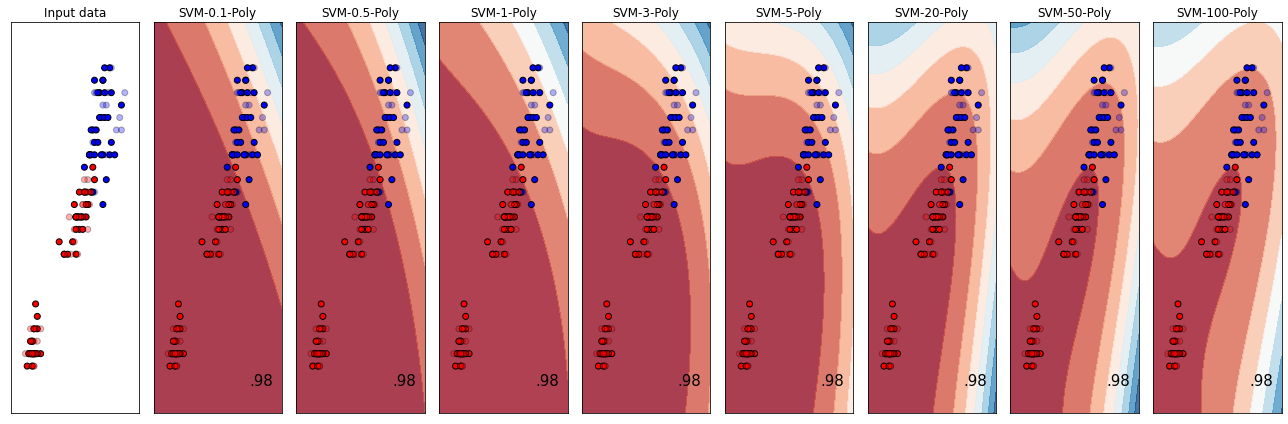

In [ ]:
classifiers = []
names = []

for i in [0.1, 0.5, 1, 3, 5, 20, 50, 100]:
  classifiers.append(SVC(kernel='poly', coef0=1.0, C=i)) # degree=3 default
  names.append("SVM-" + str(i) + "-Poly")

plot_2d_examples(classifiers, names, datasets, figsize=(18, 6))

*   Among the different degrees of the SVMs with polynomial kernel, those with degrees 20 or more gave the best test set scores. However, the small number of data we have and the graphs of SVMs in these degrees show that there may be overfitting.
*   When we look at the C values, almost all values after C=0.1 gave the highest test set score (0.98). However, there is a high probability of overfitting at high values of C in here as well.
*   The parameters giving the highest test set scores without considering overfitting were polynomials of order 20 or more and C values of 0.1 and above.

  

  


In [ ]:
svc = SVC(kernel='poly', degree=20, coef0=1.0, C=1)
X_train, y_train, X_test, y_test = train_test_split(X, y)
svc.fit(X, y)
svc.score(X, y)

0.98

*   After trying different C values, it is seen that the model tries to reduce the error rate at values starting from C=3. Overfitting is clearly seen at high values such as C=20 where the importance of the margin is significantly reduced.
*   Considering all this, it is reasonable to use values between 0.1 and 1.




